In [ ]:
G = nx.DiGraph()

In [ ]:
with open('./Bitcoin_OTC.csv', 'r') as f:
    data = csv.reader(f)
    headers = next(data)
    for row in tqdm(data):
      G.add_node(int(row[0]))
      G.add_node(int(row[1]))
      if G.has_edge(int(row[0]), int(row[1])):
        print(row[0], row[1])
      G.add_edge(row[0], row[1], weight=int(row[2])-11, timestamp=int(row[3]))

35592it [00:00, 140809.07it/s]


In [ ]:
print(G.number_of_nodes())
print(G.number_of_edges())

5881
35592


In [ ]:
!pip install thresholdclustering==1.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
Adj=nx.to_numpy_matrix(G)
cos_Adj=cosine_similarity(Adj.T)
G=nx.from_numpy_matrix(cos_Adj)
pos = nx.spring_layout(G)
weights = np.array([G[u][v]['weight'] for u,v in G.edges()])*5

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


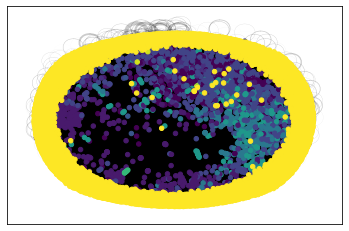

In [ ]:
import thresholdclustering
import matplotlib.cm as cm
from community import community_louvain
import matplotlib.pyplot as plt
cluster_function = community_louvain.best_partition
partition, alpha = thresholdclustering.thresholdclustering.best_partition(G, cluster_function=cluster_function)

cmap = cm.get_cmap('viridis', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos, partition.keys(), node_size=20,
                       cmap=cmap, node_color=list(partition.values()))
nx.draw_networkx_edges(G, pos, alpha=0.2,width=weights)
plt.show()

In [ ]:
print(set(partition.values()))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}
